<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Customer_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
os.environ["KAGGLE_CONFIG_DIR"] = '/content/drive/MyDrive/Colab Notebooks/Kaggle'

In [ ]:
!kaggle datasets download -d dev0914sharma/customer-clustering

  0% 0.00/25.9k [00:00<?, ?B/s]
100% 25.9k/25.9k [00:00<00:00, 18.1MB/s]


In [ ]:
!unzip '/content/customer-clustering.zip' && rm '/content/customer-clustering.zip'

Archive:  /content/customer-clustering.zip
  inflating: segmentation data legend.xlsx  
  inflating: segmentation data.csv   


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
plt.style.use('fivethirtyeight')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/segmentation data.csv')
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [ ]:
data.shape

(2000, 8)

In [ ]:
data = data.drop('ID', axis=1)

In [ ]:
np.round(data.describe(),2)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.00,2000.0,2000.00,2000.00,2000.00,2000.00,2000.00
mean,0.46,0.5,35.91,1.04,120954.42,0.81,0.74
std,0.50,0.5,11.72,0.60,38108.82,0.64,0.81
min,0.00,0.0,18.00,0.00,35832.00,0.00,0.00
25%,0.00,0.0,27.00,1.00,97663.25,0.00,0.00
50%,0.00,0.0,33.00,1.00,115548.50,1.00,1.00
75%,1.00,1.0,42.00,1.00,138072.25,1.00,1.00
max,1.00,1.0,76.00,3.00,309364.00,2.00,2.00


In [ ]:
data_norm = (data-data.min())/(data.max()-data.min())
data_norm.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5


In [ ]:
np.round(data_norm.describe(),2)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.00,2000.0,2000.00,2000.00,2000.00,2000.00,2000.00
mean,0.46,0.5,0.31,0.35,0.31,0.41,0.37
std,0.50,0.5,0.20,0.20,0.14,0.32,0.41
min,0.00,0.0,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.0,0.16,0.33,0.23,0.00,0.00
50%,0.00,0.0,0.26,0.33,0.29,0.50,0.50
75%,1.00,1.0,0.41,0.33,0.37,0.50,0.50
max,1.00,1.0,1.00,1.00,1.00,1.00,1.00


# **Looking for the right quantity of clusters**

In [15]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, max_iter=300)
  kmeans.fit(data_norm)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'WCSS')

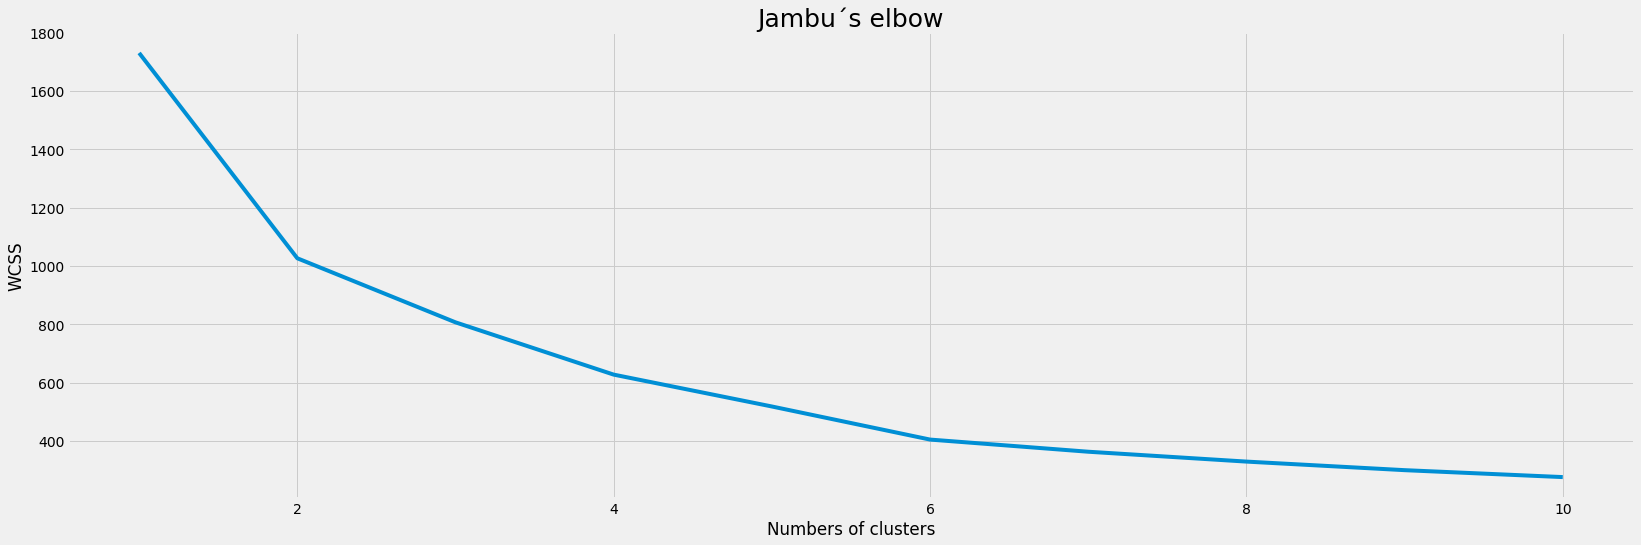

In [17]:
plt.figure(figsize=(25,8))
plt.plot(range(1,11),wcss)
plt.title("Jambu´s elbow", fontsize=25)
plt.xlabel("Numbers of clusters")
plt.ylabel("WCSS")

In [28]:
clustering = KMeans(n_clusters=5, max_iter=300)
clustering.fit(data_norm)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [29]:
data['Kmeans_Clusters'] = clustering.labels_
data.head(5)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kmeans_Clusters
0,0,0,67,2,124670,1,2,2
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,2


In [30]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pcaCostumer = pca.fit_transform(data_norm)
DFpcaCostumer = pd.DataFrame(data=pcaCostumer, columns=['Component_1','Component_2'])
pcaCostumerName = pd.concat([DFpcaCostumer, data[['Kmeans_Clusters']]], axis=1)

pcaCostumerName

,Component_1,Component_2,Kmeans_Clusters
0,0.826086,0.354652,2
1,-0.524891,0.716293,0
2,0.486009,-0.690668,1
3,0.707351,-0.028668,2
4,0.712574,-0.037939,2
...,...,...,...
1995,-0.195388,-0.680837,3
1996,-0.793264,-0.016224,3
1997,0.494899,-0.746080,1
1998,-0.875828,-0.285273,3


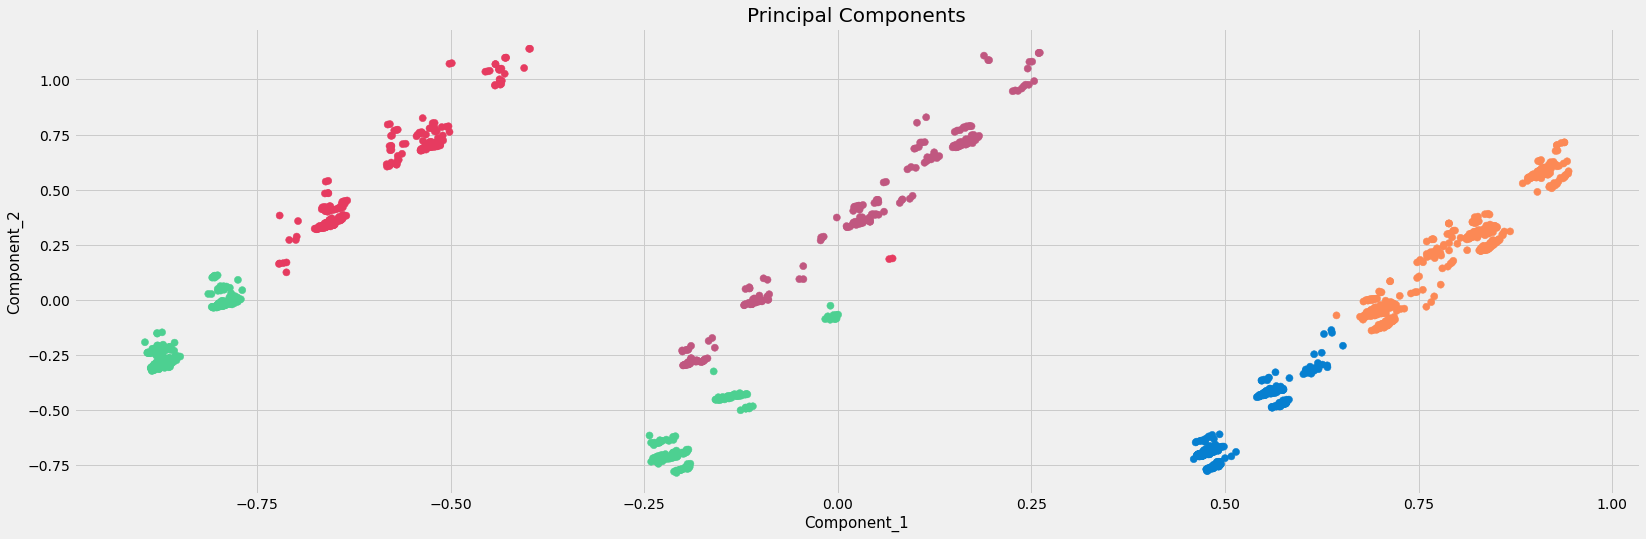

In [31]:
fig = plt.figure(figsize=(25,8))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Component_1", fontsize=15)
ax.set_ylabel("Component_2", fontsize=15)
ax.set_title("Principal Components", fontsize=20)

color = np.array(['#E63B60','#067FD0','#FC8955','#4DD091','#C05780'])
ax.scatter(x=pcaCostumerName.Component_1, y=pcaCostumerName.Component_2, c=color[pcaCostumerName.Kmeans_Clusters], s = 50 )

In [33]:
import plotly.express as px 

px.scatter(pcaCostumerName,x='Component_1', y ='Component_2', color='Kmeans_Clusters')

In [39]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(data["Kmeans_Clusters"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data["Kmeans_Clusters"]== i]['Income'],
                                y = data[data["Kmeans_Clusters"] == i]['Occupation'],
                                z = data[data["Kmeans_Clusters"] == i]['Age'],                        
                                mode = 'markers',marker_size = 5, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Income: %{x} Occupation: %{y} Age: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Occupation', titlefont_color = 'black'),
                                zaxis=dict(title = 'Age', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))